In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import os
import requests
import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv("keplerData.csv")

In [3]:
pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns',100)

In [4]:
print(df.shape)
print('The shape of train data is: Row {} columns {}'.format(df.shape[0],df.shape[1]))

(9564, 49)
The shape of train data is: Row 9564 columns 49


In [5]:
df.head()

,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_teq_err1,koi_teq_err2,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_tce_delivname,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,9.488036,2.780000e-05,-2.780000e-05,170.538750,0.002160,-0.002160,0.146,0.318,-0.146,2.95750,0.08190,-0.08190,616.0,19.5,-19.5,2.26,0.26,-0.15,793.0,NaN,NaN,93.59,29.45,-16.65,35.8,1.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,54.418383,2.480000e-04,-2.480000e-04,162.513840,0.003520,-0.003520,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,875.0,35.5,-35.5,2.83,0.32,-0.19,443.0,NaN,NaN,9.11,2.87,-1.62,25.8,2.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,10811496,K00753.01,NaN,CANDIDATE,CANDIDATE,0.000,0,0,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,-0.000581,0.969,5.126,-0.077,1.78220,0.03410,-0.03410,10800.0,171.0,-171.0,14.60,3.92,-1.31,638.0,NaN,NaN,39.30,31.04,-10.49,76.3,1.0,q1_q17_dr25_tce,5853.0,158.0,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,-0.092,2.40641,0.00537,-0.00537,8080.0,12.8,-12.8,33.46,8.50,-2.83,1395.0,NaN,NaN,891.96,668.95,-230.35,505.6,1.0,q1_q17_dr25_tce,5805.0,157.0,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,-0.001130,0.701,0.235,-0.478,1.65450,0.04200,-0.04200,603.0,16.9,-16.9,2.75,0.88,-0.35,1406.0,NaN,NaN,926.16,874.33,-314.24,40.9,1.0,q1_q17_dr25_tce,6031.0,169.0,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


In [6]:
df = df.rename(columns={'kepid':'KepID',
'kepoi_name':'KOIName',
'kepler_name':'KeplerName',
'koi_disposition':'Exoplanet_Archive_Disposition',
'koi_pdisposition':'Disposition_Using_KeplerData',
'koi_score':'DispositionScore',
'koi_fpflag_nt':'NotTransit_LikeFPFlag',
'koi_fpflag_ss':'StellarEclipse_FP_Flag',
'koi_fpflag_co':'CentroidOffsetFPFlag',
'koi_fpflag_ec':'EphemerisMatchIndicatesContaminationFPFlag',
'koi_period':'OrbitalPeriod_days',
'koi_period_err1':'OrbitalPeriodUpper_days',
'koi_period_err2':'OrbitalPeriodLower_days',
'koi_time0bk':'TransitEpoch_BKJD',
'koi_time0bk_err1':'TransitEpoch_Lower',
'koi_time0bk_err2':'TransitEpoch_Upper',
'koi_impact':'ImpactParamete',
'koi_impact_err1':'ImpactParameter_Lower',
'koi_impact_err2':'ImpactParameter_Upper',
'koi_duration':'TransitDuration_hrs',
'koi_duration_err1':'TransitDuration_Lower',
'koi_duration_err2':'TransitDuration_Upper',
'koi_depth':'TransitDepth_ppm',
'koi_depth_err1':'TransitDepth_Lower',
'koi_depth_err2':'TransitDepth_Upper',
'koi_prad':'PlanetaryRadius_Earthradii',
'koi_prad_err1':'PlanetaryRadius_Lower',
'koi_prad_err2':'PlanetaryRadius_Upper',
'koi_teq':'EquilibriumTemperature_K',
'koi_teq_err1':'EquilibriumTemperature_Lower',
'koi_teq_err2':'EquilibriumTemperature_Upper',
'koi_insol':'InsolationFlux_Earthflux',
'koi_insol_err1':'InsolationFlux_Lower',
'koi_insol_err2':'InsolationFlux_Upper',
'koi_model_snr':'TransitSignal_to_Noise',
'koi_tce_plnt_num':'TCE_PlanetNumber',
'koi_tce_delivname':'TCE_DeliverName',
'koi_steff':'StellarEffectiveTemperature_K',
'koi_steff_err1':'StellarEffectiveTemp_Lower',
'koi_steff_err2':'StellarEffectiveTemp_Upper',
'koi_slogg':'StellarSurfaceGravity',
'koi_slogg_err1':'Stellar_SurfaceGravity_Lower',
'koi_slogg_err2':'Stellar_SurfaceGravity_Upper',
'koi_srad':'StellarRadius_Solarradii',
'koi_srad_err1':'StellarRadius_Lower',
'koi_srad_err2':'StellarRadius_Upper',
'ra':'RA_deg',
'dec':'Dec_deg',
'koi_kepmag':'Kepler_band[mag]'
})

In [7]:
df.head()

,KepID,KOIName,KeplerName,Exoplanet_Archive_Disposition,Disposition_Using_KeplerData,DispositionScore,NotTransit_LikeFPFlag,StellarEclipse_FP_Flag,CentroidOffsetFPFlag,EphemerisMatchIndicatesContaminationFPFlag,OrbitalPeriod_days,OrbitalPeriodUpper_days,OrbitalPeriodLower_days,TransitEpoch_BKJD,TransitEpoch_Lower,TransitEpoch_Upper,ImpactParamete,ImpactParameter_Lower,ImpactParameter_Upper,TransitDuration_hrs,TransitDuration_Lower,TransitDuration_Upper,TransitDepth_ppm,TransitDepth_Lower,TransitDepth_Upper,PlanetaryRadius_Earthradii,PlanetaryRadius_Lower,PlanetaryRadius_Upper,EquilibriumTemperature_K,EquilibriumTemperature_Lower,EquilibriumTemperature_Upper,InsolationFlux_Earthflux,InsolationFlux_Lower,InsolationFlux_Upper,TransitSignal_to_Noise,TCE_PlanetNumber,TCE_DeliverName,StellarEffectiveTemperature_K,StellarEffectiveTemp_Lower,StellarEffectiveTemp_Upper,StellarSurfaceGravity,Stellar_SurfaceGravity_Lower,Stellar_SurfaceGravity_Upper,StellarRadius_Solarradii,StellarRadius_Lower,StellarRadius_Upper,RA_deg,Dec_deg,Kepler_band[mag]
0,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,9.488036,2.780000e-05,-2.780000e-05,170.538750,0.002160,-0.002160,0.146,0.318,-0.146,2.95750,0.08190,-0.08190,616.0,19.5,-19.5,2.26,0.26,-0.15,793.0,NaN,NaN,93.59,29.45,-16.65,35.8,1.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,54.418383,2.480000e-04,-2.480000e-04,162.513840,0.003520,-0.003520,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,875.0,35.5,-35.5,2.83,0.32,-0.19,443.0,NaN,NaN,9.11,2.87,-1.62,25.8,2.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,10811496,K00753.01,NaN,CANDIDATE,CANDIDATE,0.000,0,0,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,-0.000581,0.969,5.126,-0.077,1.78220,0.03410,-0.03410,10800.0,171.0,-171.0,14.60,3.92,-1.31,638.0,NaN,NaN,39.30,31.04,-10.49,76.3,1.0,q1_q17_dr25_tce,5853.0,158.0,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,-0.092,2.40641,0.00537,-0.00537,8080.0,12.8,-12.8,33.46,8.50,-2.83,1395.0,NaN,NaN,891.96,668.95,-230.35,505.6,1.0,q1_q17_dr25_tce,5805.0,157.0,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,-0.001130,0.701,0.235,-0.478,1.65450,0.04200,-0.04200,603.0,16.9,-16.9,2.75,0.88,-0.35,1406.0,NaN,NaN,926.16,874.33,-314.24,40.9,1.0,q1_q17_dr25_tce,6031.0,169.0,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


In [8]:
df.drop(columns=['EquilibriumTemperature_Lower','EquilibriumTemperature_Upper','KeplerName','TCE_DeliverName'],inplace=True)

In [9]:
#Separiting the categorical features

categorical= df.select_dtypes(include =[np.object])
print("Categorical Features in DataSet:",categorical.shape[1])
print(categorical.columns)

Categorical Features in DataSet: 3
Index(['KOIName', 'Exoplanet_Archive_Disposition',
       'Disposition_Using_KeplerData'],
      dtype='object')


In [10]:
# Filling the null values of numerical features with the respective mean

numerical=df.select_dtypes(include =[np.float64,np.int64])

from sklearn.impute import SimpleImputer

imputer= SimpleImputer(strategy='mean')
df_numerical=imputer.fit_transform(numerical)

df_numerical=pd.DataFrame(df_numerical,columns=numerical.columns)

In [11]:
df= pd.concat([df_numerical,categorical],axis=1)

In [12]:
df['Exoplanet_Archive_Disposition'].value_counts()

Exoplanet_Archive_Disposition
FALSE POSITIVE    4840
CANDIDATE         2366
CONFIRMED         2358
Name: count, dtype: int64

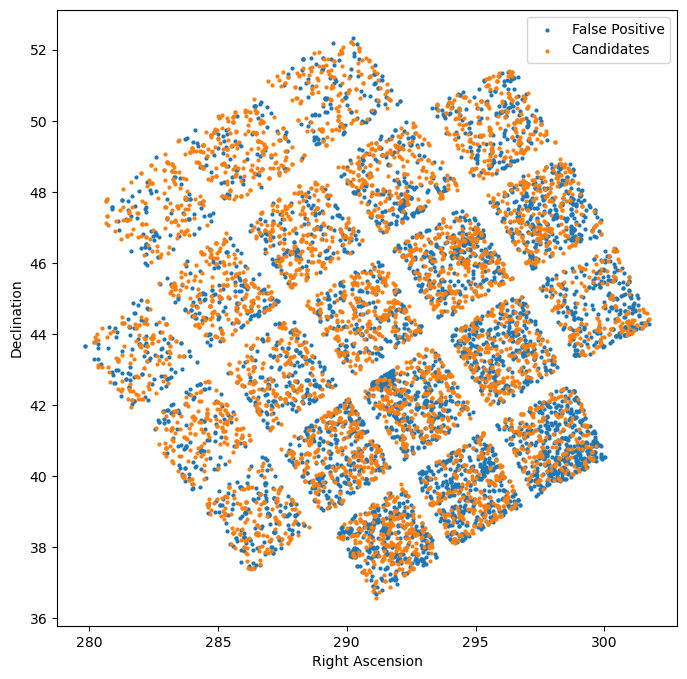

In [13]:
Candidate = df[df.Disposition_Using_KeplerData == 'CANDIDATE']
FP = df[df.Disposition_Using_KeplerData == 'FALSE POSITIVE']

ra_f, dec_f = FP.RA_deg, FP.Dec_deg
ra_c, dec_c = Candidate.RA_deg, Candidate.Dec_deg

fig = plt.figure(figsize=(8,8))

plt.scatter(ra_f, dec_f, s=4, label='False Positive')
plt.scatter(ra_c, dec_c, s=4, label="Candidates")

plt.xlabel("Right Ascension")
plt.ylabel("Declination")

plt.legend()

In [14]:
Candidate = df[df.Disposition_Using_KeplerData == 'CANDIDATE']

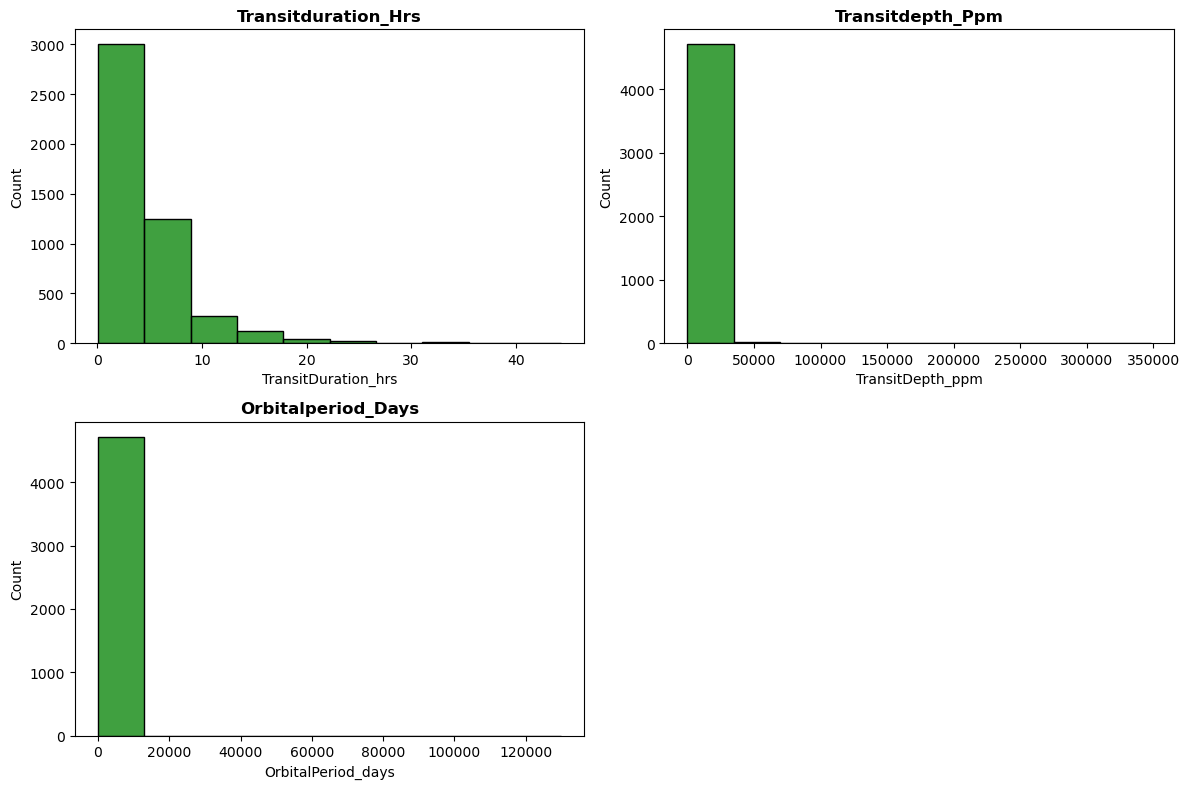

In [15]:
Transit_Properties1=['TransitDuration_hrs','TransitDepth_ppm','OrbitalPeriod_days']

target = [i for i in Transit_Properties1]
plt.figure(figsize=(12,8))
for n,i in enumerate(target):
    plot=plt.subplot(2,2,n+1)
    sns.histplot(Candidate[i],color='green',bins=10)
    plt.title(f'{i.title()}',weight='bold')
    plt.tight_layout()

In [16]:
Confirmed = df[df.Exoplanet_Archive_Disposition == 'CONFIRMED']

<Axes: xlabel='EquilibriumTemperature_K', ylabel='Density'>

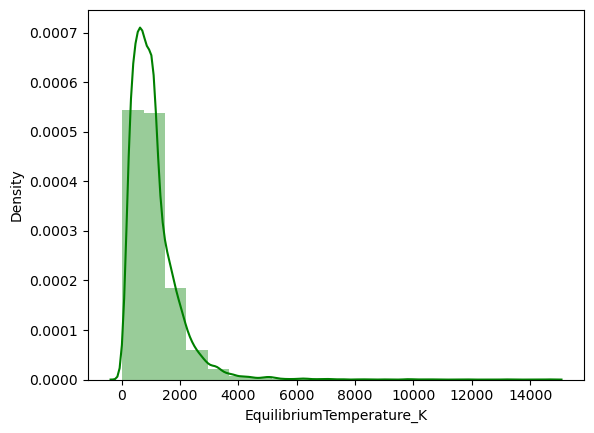

In [17]:
sns.distplot(df['EquilibriumTemperature_K'],color='green',bins=20)

<Axes: xlabel='TCE_PlanetNumber', ylabel='Count'>

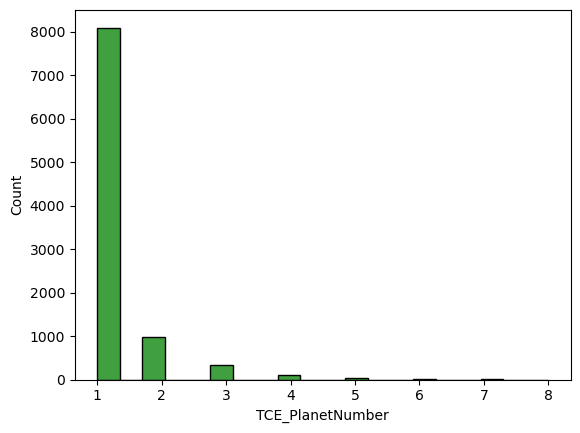

In [18]:
sns.histplot(df['TCE_PlanetNumber'],color='green',bins=20)

<Axes: >

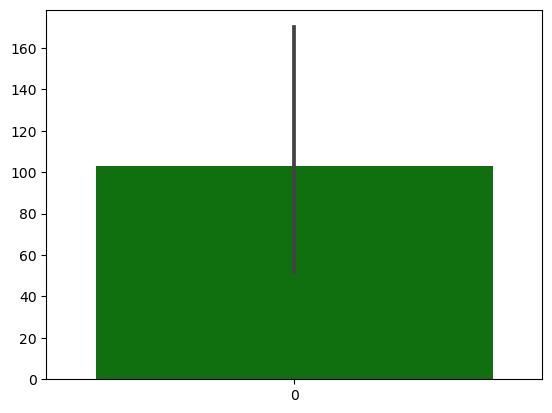

In [19]:
sns.barplot(df['PlanetaryRadius_Earthradii'],color='green')

In [20]:
#Removing the unnecessary features

df.drop(columns=['KepID','KOIName','InsolationFlux_Earthflux','InsolationFlux_Lower', 'InsolationFlux_Upper','StellarSurfaceGravity','Stellar_SurfaceGravity_Lower', 'Stellar_SurfaceGravity_Upper',],inplace=True)

In [21]:
df1=df[['DispositionScore','NotTransit_LikeFPFlag', 'StellarEclipse_FP_Flag',
       'CentroidOffsetFPFlag', 'EphemerisMatchIndicatesContaminationFPFlag',
       'OrbitalPeriod_days','TransitEpoch_BKJD','ImpactParamete','TransitDuration_hrs','PlanetaryRadius_Earthradii','EquilibriumTemperature_K',
       'TransitSignal_to_Noise', 'TCE_PlanetNumber','StellarEffectiveTemperature_K','StellarRadius_Solarradii',]]

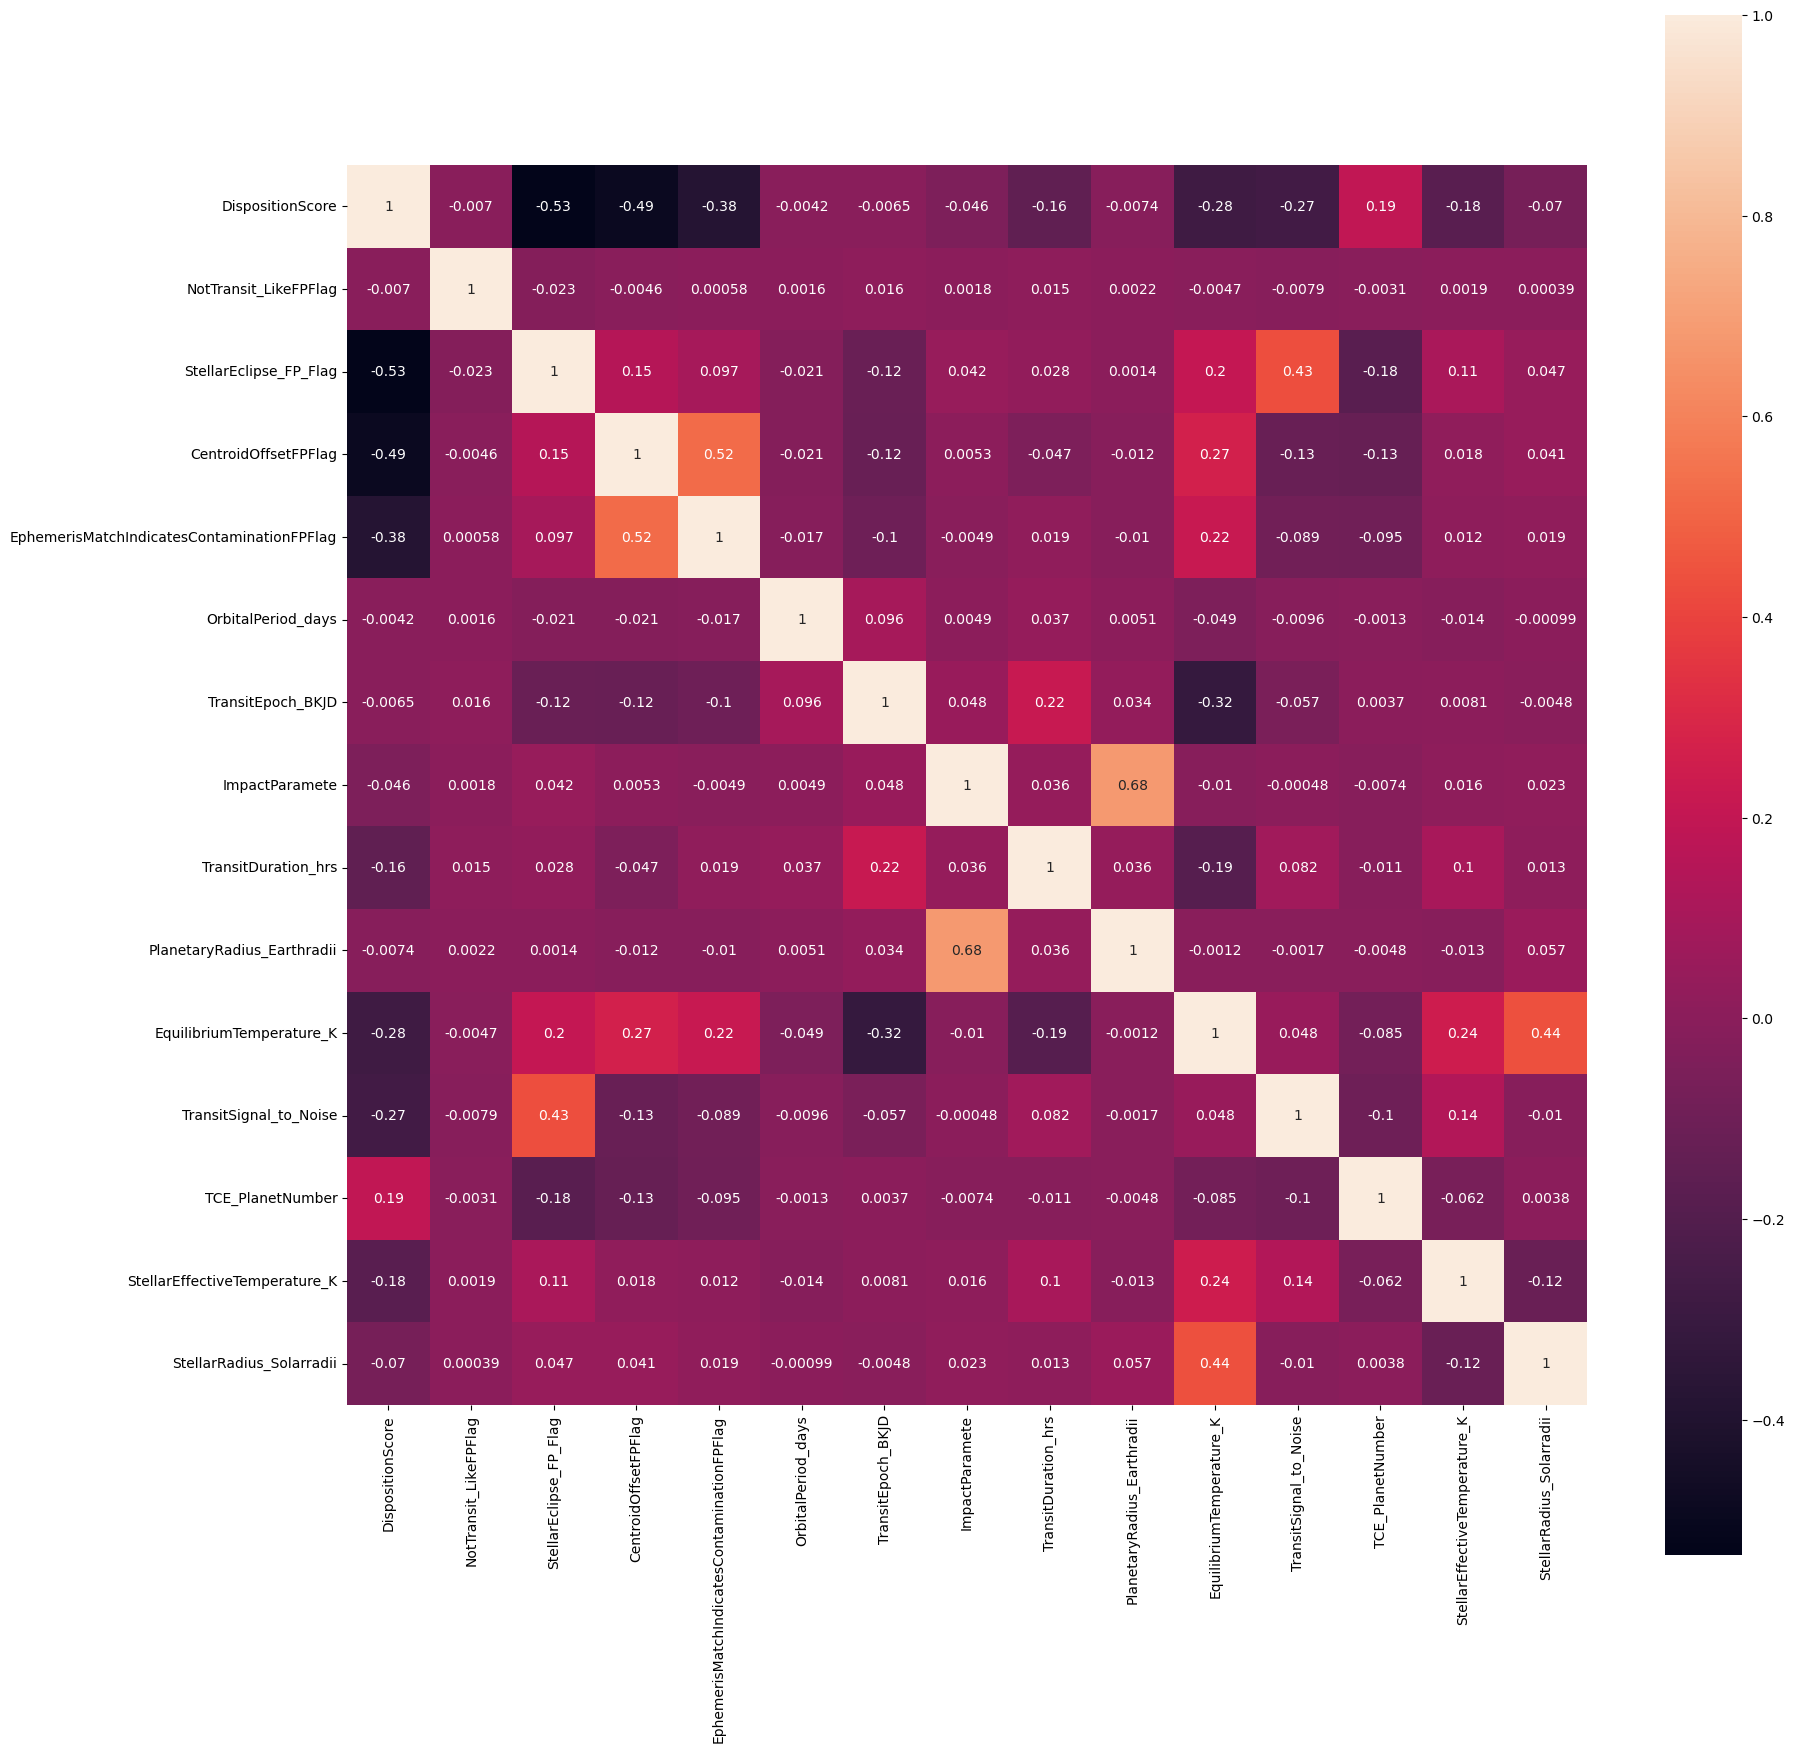

In [22]:
plt.subplots(figsize=(20,20))
sns.heatmap(df1.corr(), square=True,annot=True)
plt.show()

In [23]:
df=df.drop('EphemerisMatchIndicatesContaminationFPFlag',axis=1)

In [24]:
X=df.drop(['Disposition_Using_KeplerData'],axis=1)   

y=df['Disposition_Using_KeplerData']

In [25]:
X=pd.get_dummies(X,columns=['Exoplanet_Archive_Disposition'],drop_first=True)
y=y.apply(lambda x: 1 if x == 'CANDIDATE' else 0)

In [26]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)